In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname = 'C:\Windows\Fonts\malgun.ttf').get_name()
rc('font',family=font_name)

In [8]:
df = pd.read_csv('crime_in_Seoul.csv',encoding='cp949')
df.head(3)

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
0,중부서,2,2,3,2,105,65,"1,395",477,"1,355","1,170"
1,종로서,3,3,6,5,115,98,"1,070",413,"1,278","1,070"
2,남대문서,1,0,6,4,65,46,"1,153",382,869,794


In [9]:
# 상관관계
# 양의 관계, 음의 관계 판단
df.corr()

,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거
살인 발생,1.000000,0.953920,0.640281,0.486899,0.621728,0.572858
살인 검거,0.953920,1.000000,0.648964,0.505346,0.575409,0.571278
강도 발생,0.640281,0.648964,1.000000,0.866390,0.745120,0.798568
강도 검거,0.486899,0.505346,0.866390,1.000000,0.604698,0.744171
강간 발생,0.621728,0.575409,0.745120,0.604698,1.000000,0.915617
강간 검거,0.572858,0.571278,0.798568,0.744171,0.915617,1.000000


In [13]:
df[['살인 발생','살인 검거']].head(5)

,살인 발생,살인 검거
0,2,2
1,3,3
2,1,0
3,2,2
4,3,2


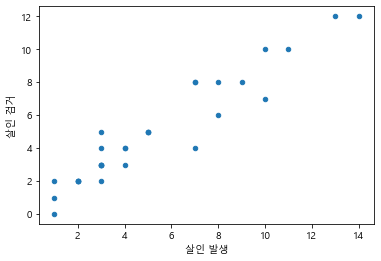

In [16]:
df.plot(kind='scatter',x='살인 발생',y='살인 검거')
plt.show()
# 딥러닝할 때 회귀선 긋는 거 배움

In [75]:
df1 = pd.read_csv('2014년 졸음운전 교통사고.csv',encoding='cp949')
df2 = pd.read_csv('2015년 졸음운전 교통사고.csv',encoding='cp949')
df3 = pd.read_csv('2016년 졸음운전 교통사고.csv',encoding='cp949')
display(df1.head(3))
display(df2.head(3))
display(df3.head(3))

,구분,사고(건),사망(명),부상(명)
0,2014년1월,169,7,347
1,2014년2월,145,3,268
2,2014년3월,206,12,358


,구분,사고(건),사망(명),부상(명)
0,2015년1월,205,8,375
1,2015년2월,175,8,375
2,2015년3월,237,4,492


,구분,사고(건),사망(명),부상(명)
0,2016년1월,192,5,387
1,2016년2월,174,6,328
2,2016년3월,217,7,435


In [76]:
# data = pd.concat([df1,df2,df3], index_col = '구분')
# data = pd.concat([df1,df2,df3]).reset_index(drop=True)    # index를 숫자로 하는데 초기화하고 싶을 때
# data = pd.concat([df1,df4],ignore_index = True)
data = pd.concat([df1,df2,df3])
data.set_index('구분',inplace=True)
data.head(3)

,사고(건),사망(명),부상(명)
구분,,,
2014년1월,169,7,347
2014년2월,145,3,268
2014년3월,206,12,358


In [77]:
# data 원본 유지하고 싶을 때 사본 만들어서 사용
dt = data.copy()
dt.head(3)

,사고(건),사망(명),부상(명)
구분,,,
2014년1월,169,7,347
2014년2월,145,3,268
2014년3월,206,12,358


In [78]:
# 날짜 포맷팅
dt.index = pd.to_datetime(dt.index, format='%Y년%m월')
dt.set_index([dt.index.year, dt.index.month], inplace=True)
dt.index.names = ['연도','월']
dt

사고(건)  사망(명)  부상(명)
연도   월                      
2014 1     169      7    347
     2     145      3    268
     3     206     12    358
     4     182      4    360
     5     218     17    474
     6     233     13    457
     7     229     14    431
     8     222      9    447
     9     225     15    430
     10    210     14    392
     11    209     10    386
     12    178     12    329
2015 1     205      8    375
     2     175      8    375
     3     237      4    492
     4     227     10    486
     5     231      9    504
     6     207      8    401
     7     273      7    556
     8     268     19    534
     9     252     10    501
     10    214     14    475
     11    199      3    398
     12    213      8    428
2016 1     192      5    387
     2     174      6    328
     3     217      7    435
     4     216      7    419
     5     239     13    522
     6     200     12    362
     7     227      9    460
     8     230      7    490
     9     187     13    347
     10    183     10    367
     11    200      5    418
     12    168      4    364

(0.0, 20.0)

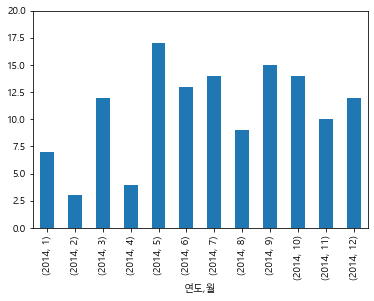

In [79]:
df_2014 = dt['사망(명)'].iloc[0:12]
df_2014.plot(kind='bar')
plt.ylim(0,20)
# plt.xticks(rotation = '0')

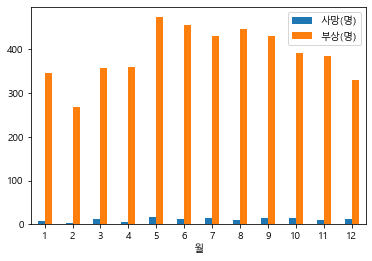

In [88]:
dt.loc[2014][['사망(명)','부상(명)']].plot(kind='bar',rot=0)
plt.show()

In [85]:
y = dt.groupby('연도').mean()[['사망(명)']]
y

,사망(명)
연도,
2014,10.833333
2015,9.000000
2016,8.166667


In [90]:
m = dt.groupby('월').mean()[['사망(명)']]
m.head(3)

,사망(명)
월,
1,6.666667
2,5.666667
3,7.666667


#### Time Series

In [95]:
import pandas as pd
import random

In [93]:
dates = pd.date_range('2016-05-01','2016-05-07')
dates

DatetimeIndex(['2016-05-01', '2016-05-02', '2016-05-03', '2016-05-04',
               '2016-05-05', '2016-05-06', '2016-05-07'],
              dtype='datetime64[ns]', freq='D')

In [113]:
tmp1 = pd.Series(np.random.randint(0,100,7), index = dates)
tmp1

2016-05-01    86
2016-05-02    65
2016-05-03    53
2016-05-04    48
2016-05-05    37
2016-05-06    14
2016-05-07    88
Freq: D, dtype: int32

In [114]:
tmp2 = pd.Series(np.random.randint(0,100,7), index = dates)
tmp2

2016-05-01    27
2016-05-02    96
2016-05-03    48
2016-05-04    32
2016-05-05    40
2016-05-06    31
2016-05-07    17
Freq: D, dtype: int32

In [118]:
pd.concat([tmp1,tmp2], axis=1)

,0,1
2016-05-01,80,27
2016-05-02,92,96
2016-05-03,82,48
2016-05-04,85,32
2016-05-05,97,40
2016-05-06,84,31
2016-05-07,76,17


In [123]:
exam = pd.DataFrame({'math':tmp1,'philosophy':tmp2})
exam

,math,philosophy
2016-05-01,80,27
2016-05-02,92,96
2016-05-03,82,48
2016-05-04,85,32
2016-05-05,97,40
2016-05-06,84,31
2016-05-07,76,17


In [129]:
exam.iloc[5,:]

math          84
philosophy    31
Name: 2016-05-06 00:00:00, dtype: int64

In [130]:
exam.loc[['2016-05-04','2016-05-06','2016-05-07']]

,math,philosophy
2016-05-04,85,32
2016-05-06,84,31
2016-05-07,76,17
